# 図示

* 全てを扱うわけではないが、次のサイトに基づく
    * [図示とシミュレーション](https://py4basics.github.io/1_Basics_VI.html)

## 始める前に

次のコードはJupyterLite特有のコードとなる（試験範囲外）。実行しなさい。

In [ ]:
# CELL PROVIDED
import piplite
await piplite.install(['py4macro','japanize-matplotlib-jlite'])

次のコードを実行し，それぞれのパッケージやモジュールをインポートしなさい。

In [1]:
# CELL PROVIDED
import numpy as np
import matplotlib.pyplot as plt
import random
from py4macro import xvalues

# 以下は試験範囲外（プロットのサイズを調整する）
import japanize_matplotlib_jlite
plt.rcParams['figure.figsize'] = (5, 3.75)

＜説明＞
* `numpy`：数学の関数が含まれるモジュール
* `matplotlib.pyplot`：図示のためのパッケージ`matplotlib`の中にあるモジュール`pyplot`（`plt`として読み込む）
* `py4macro`：`xvalues()`関数が含まれている。
* `random`：ランダム変数や分布に関連するモジュール
* 以下は試験範囲外
    * `japanize_matplotlib_jlite`：`matplotlib`を日本語化するモジュール
    * `plt.rcParams['figure.figsize'] = (5, 3.75)`：表示されるプロットの大きさを指定する。

`Matplotlib`は大きなライブラリであり，その中にある`pyplot`モジュールを使うことになる。慣例に沿って`plt`としてインポートしている。

## ライン・プロット

### 説明

`plt.plot()`関数を使いデータをプロットす。次がコードの構文となる。
```
plt.plot(＜x軸の値＞, ＜y軸の値＞)
```

実際にプロットするために次の値を設定しよう。

In [2]:
# CELL PROVIDED

x = [1,2,3]
y = [10,30,20]

引数に`x`と`y`を指定するとプロットできる。

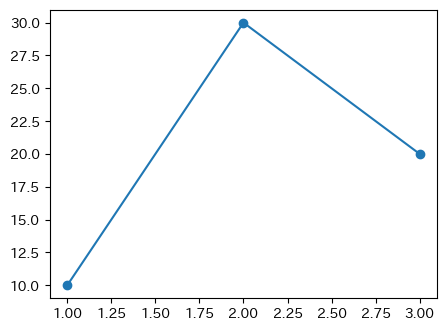

In [3]:
plt.plot(x, y, marker='o')

* `marker='o'`は後で説明する。
* 「●」のマーカーがある点が`x`と`y`の値の組み合わせとして表示されている。
* 座標の点を増やすことによりスムーズな曲線を表示することが可能となる。

### 値の生成

#### `x`軸の値

モジュール`py4macro`に含まれる`xvalues()`関数を使う。

In [4]:
help(xvalues)

Help on function xvalues in module py4macro.py4macro:

xvalues(l, h, n)
    引数
        l：最小値（lowest value）
        h：最大値（highest value）
        n：作成する数値の数を指定する（正の整数型，number of values）
    戻り値
        n個の要素から構成されるリスト



この関数を使い，`-1`から`1`の間に`5`の値を生成し`x`に割り当てる。

In [5]:
x = xvalues(-1, 1, 5)
x

[-1.0, -0.5, 0.0, 0.5, 1.0]

#### `y`軸の値


次の２次関数をプロットしたいとしよう。

$$y=x^2$$

まず関数を作成する。

In [6]:
def quadratic(x):
    
    return x**2

次に，`x`の値を使い内包表記で`y`の値から構成されるリストを作成する。

In [7]:
y = [quadratic(i) for i in x]
y

[1.0, 0.25, 0.0, 0.25, 1.0]

### 曲線のプロット

上で作成した`x`と`y`を使いプロットしよう。

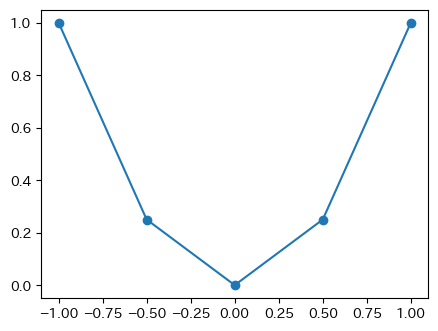

In [8]:
plt.plot(x, y, marker='o')

もっと座標を増やしてみよう。

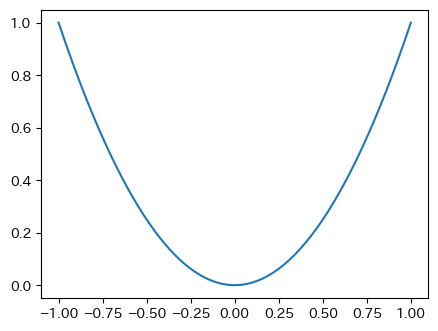

In [9]:
x = xvalues(-1, 1, 200)
y = [quadratic(i) for i in x]

plt.plot(x, y)

### `plot()`の基本的な引数

`plot()`に引数を使うことによりデータの表示方法を指定できる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `linestyle`：線のスタイル（リストにして列の順番で指定する;`-`，`--`，`-.`，`:`などがある）
* `linewidth` or `lw`：線の幅
* `color` or `c`：色（[参照サイト](https://matplotlib.org/stable/gallery/color/named_colors.html)）
    * `r`又は`red`は赤
    * `k`又は`black`は黒
    * `g`又は`green`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/stable/api/markers_api.html)）
* `markersize`：マーカーの大きさ

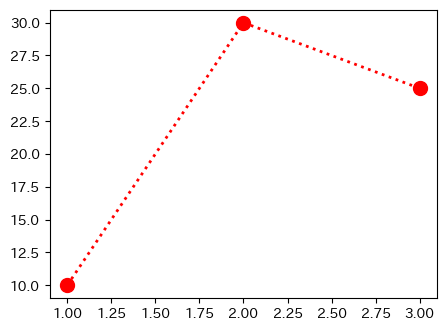

In [10]:
plt.plot([1,2,3], [10,30,25],
         linestyle=':',
         linewidth=2,
         color='r',
         marker='o',
         markersize=10)

### その他の「飾り付け」

次の５つは`plt.plot()`の下に付け加えることによって表示できる。
* `plt.title()`：タイトルを設定する。
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.xlabel()`：横軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.ylabel()`：縦軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。

Text(0, 0.5, '縦軸')

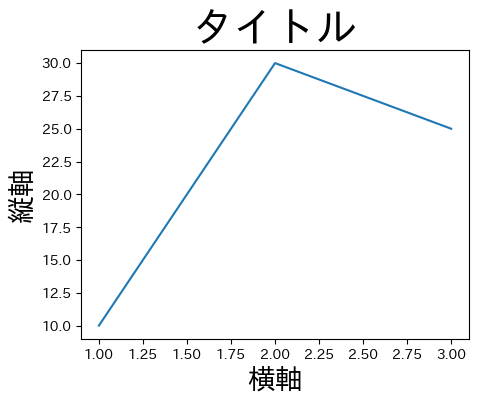

In [11]:
plt.plot([1,2,3], [10,30,25])
plt.title('タイトル', size=30)
plt.xlabel('横軸', size=20)
plt.ylabel('縦軸', size=20)

図の大きさを変更するには，例えば，次の行を`plt.plot()`の**上**に付け加えるだけである。
```
plt.figure(figsize=(7,3))
```
この例では，横の長さを`7`，縦の長さを`3`に指定している（単位はインチ）。
* `plt.figure()`は透明のキャンバスを準備する。
* 引数`figsize=(8,4)`は，そのキャンバスのサイズを指定する。
* 透明のキャンバス上に，`plt.plot()`は図をプロットすることになる。

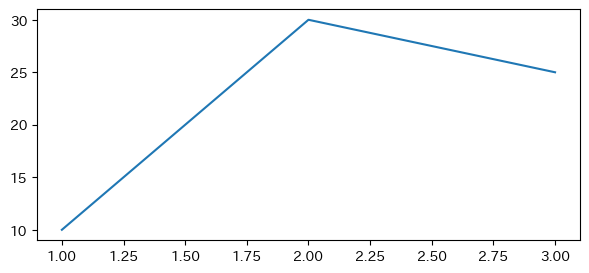

In [12]:
plt.figure(figsize=(7,3))
plt.plot([1,2,3], [10,30,25])

## ヒストグラム

基本的には次の構文となる。
```
plt.hist(＜データ＞)
```

まず標準正規分布からランダム変数を10,000個抽出して変数`z0`に割り当てよう。

In [13]:
z0 = [random.gauss(0,1) for _ in range(10_000)]

このデータのヒストグラムを表示してみよう。

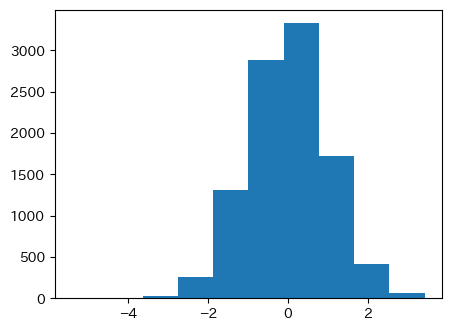

In [14]:
plt.hist(z0)
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `bins`：階級の数（柱の数）
    * 整数型を使えば文字通りの柱の数となる。
    * 区間の値をリストとして設定することができる。例えば，`0`と`1`を等区間に柱を２つ設定する場合は`[0, 0.5, 1]`となる。
* `linewidth`又は`lw`：柱の間隔（デフォルトは`1`）
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`又は`red`：赤
    * `k`又は`black`：黒
    * `g`又は`green`：グリーン
    * `b`又は`blue`：青
* `edgecolor`又は`ec`：柱の境界線の色
* `density`：縦軸を相対度数にする（デフォルトは`False`）
    * 全ての柱の**面積**の合計が`1`になるように縦軸が調整される。（１つの柱の高さが`1`よりも大きくなる場合もある。）
    
上のヒストグラムに引数をしてしてみよう。

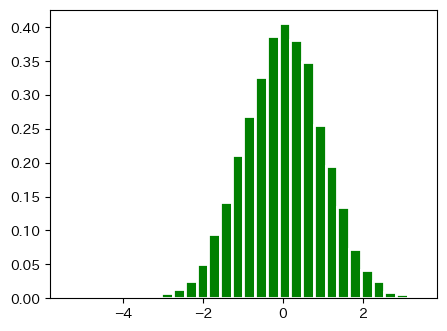

In [15]:
plt.hist(z0,
         bins = 30,
         linewidth=2,
         color='green',
         edgecolor='white',
         density=True)
pass

その他の「飾り付け」について。

図のサイズを調整するには，次のコードを`plt.plot()`の上に付け加える。
```
plt.figure( figsize=(6,4) )
```
この例では，横の長さを`6`，縦の長さを`4`としている（単位はインチ）。

次の５つは`plt.plot()`の下に付け加えることによって表示できる。
* `plt.title()`：タイトルを設定する。
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.xlabel()`：横軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `plt.ylabel()`：縦軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。

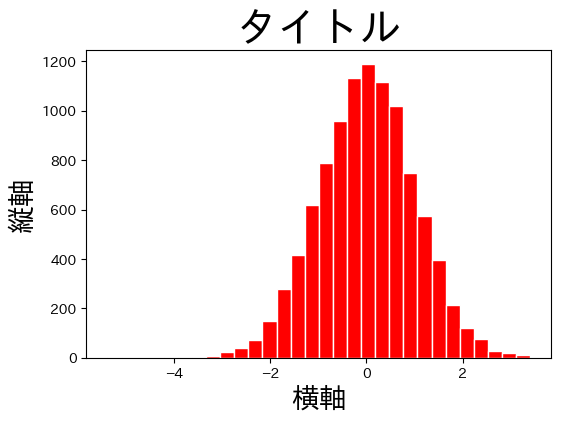

In [16]:
plt.figure( figsize=(6,4) )
plt.hist(z0,
         bins = 30,
         color='red',
         edgecolor='white')
plt.title('タイトル', size=30)
plt.xlabel('横軸', size=20)
plt.ylabel('縦軸', size=20)
pass